In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from google.colab import files
import pandas as pd
import io
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)
path="/content/sample_data/movies.csv"
df=pd.read_csv(path)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
# let's look at the the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [ ]:
# let's see if there is any missing data
for col in df.columns:
  pct_missing=np.mean(df[col].isnull())
  print('{} - {}%'.format(col,pct_missing))

In [ ]:
#Data types for our columns
df.dtypes

In [ ]:
# change data type
df['gross']=df['gross'].astype('int64')
df['budget']=df['budget'].astype('int64')

In [ ]:
df

In [ ]:
 df=df.sort_values(by=['gross'],inplace=False,ascending=False)
 

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
#Drop any duplicates
df.drop_duplicates()

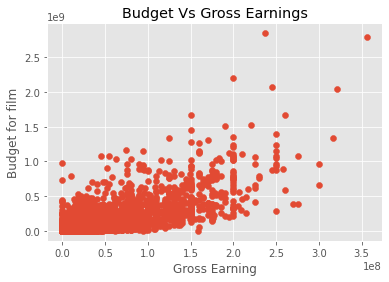

In [ ]:
# scatter plotwith budget Vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for film')
plt.show()

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


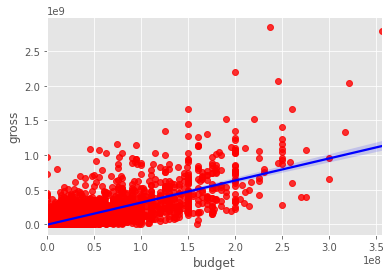

In [ ]:
#plot budget Vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [ ]:
# Let's start looking at corelation

In [ ]:
# pearson,kendall,spearman
df.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805
score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868
votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359
budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941
gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478
runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000


In [ ]:
# High corelation beween buget and gross

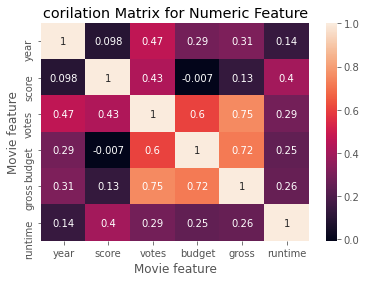

In [ ]:
correlation_matrix=df.corr(method='spearman')
sns.heatmap(correlation_matrix,annot=True)
plt.title('corelation Matrix for Numeric Feature')
plt.xlabel("Movie feature")
plt.ylabel("Movie feature")
plt.show()

In [ ]:
# LOoks at Company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2335,56,237000000,2847246203,2254,162
7445,535,5,0,2019,183,8.4,903000,162,743,2242,56,356000000,2797501328,1606,181
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,56,200000000,2201647264,2254,194
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,56,245000000,2069521700,1540,138
7244,536,5,0,2018,192,8.4,897000,162,743,2242,56,321000000,2048359754,1606,149


In [ ]:
df_numerised=df
for col_name in df_numerised.columns:
  if(df_numerised[col_name].dtype=='object'):
    df_numerised[col_name]=df_numerised[col_name].astype('category')
    df_numerised[col_name]=df_numerised[col_name].cat.codes

In [ ]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2335,56,237000000,2847246203,2254,162
7445,535,5,0,2019,183,8.4,903000,162,743,2242,56,356000000,2797501328,1606,181
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,56,200000000,2201647264,2254,194
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,56,245000000,2069521700,1540,138
7244,536,5,0,2018,192,8.4,897000,162,743,2242,56,321000000,2048359754,1606,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,6,5,1989,1277,4.5,274,117,82,2798,56,0,0,1159,92
1614,1745,6,10,1989,55,5.2,1300,1033,1743,166,55,0,0,146,85
1606,2691,6,8,1989,257,6.0,2900,2743,946,1195,6,0,0,2238,89
1601,3836,12,4,1989,1160,7.1,1500,1105,1696,681,18,0,0,504,104


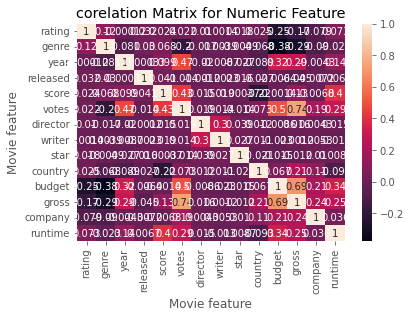

In [ ]:
correlation_matrix=df_numerised.corr(method='spearman')
sns.heatmap(correlation_matrix,annot=True)
plt.title('corelation Matrix for Numeric Feature')
plt.xlabel("Movie feature")
plt.ylabel("Movie feature")
plt.show()

In [ ]:
df_numerised.corr()

In [ ]:
correlation_mat=df_numerised.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

rating   rating      1.000000
         genre       0.072423
         year        0.008779
         released    0.016613
         score      -0.001314
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 196, dtype: float64

In [ ]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
gross     genre      -0.235650
genre     gross      -0.235650
budget    rating     -0.176002
                        ...   
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
company   company     1.000000
runtime   runtime     1.000000
Length: 196, dtype: float64

In [ ]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
rating    rating      1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Votes and budget have highest correlation  in the data